In [ ]:
#Predicting Heart Disease: Whether someone has heart disease or not,
# given clinical parameters
kaggle.com eart disease uci
https://www.kaggle.com/code/imabhilash/heart-disease-uci
    https://www.kaggle.com/code/desalegngeb/heart-disease-predictions
https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
#Create the import statements to stay together like in a class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay



In [ ]:
# Load the data
df = pd.read_csv("heart-disease.csv")
df.head()
df.shape
df.tail()

In [ ]:
## Data exploration ,Exploratory  Data analysis ,
#understand and achieve expertise with data

df["target"].value_counts()
# below data shows 165 have heart disease , 138 have no heart disease

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [ ]:
df.info()

In [ ]:
#Find if there are any mssing values
df.isna().sum()



In [ ]:
df.describe()


In [ ]:
#Heart disease compare sex with target
df.sex.value_counts()
#Below data shows 207 males , 96 females

In [ ]:
#compare target with sex, finding which sex has heart disease
pd.crosstab(df.target,df.sex)

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("heart disease for each sex")
plt.xlabel("0-No disease , 1- disease")
plt.ylabel("Numbers- Counts ");
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Text(0, 0.5, 'Max Heart Rate')

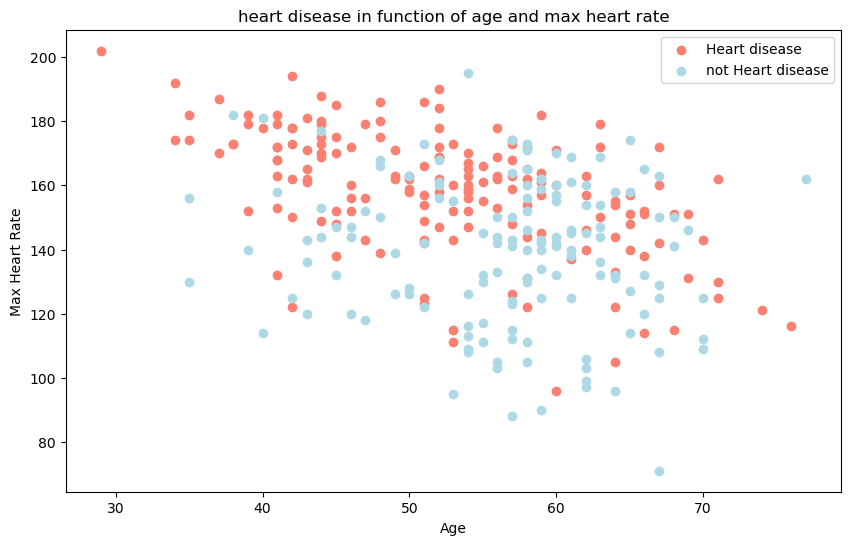

In [11]:
plt.figure(figsize=(10,6))
#age where target==1 which have heart disease
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],
           c=["salmon"])
#age where target==1 which do not have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],
           c=["lightblue"]);

#add some info to make this more sense
plt.title("heart disease in function of age and max heart rate")
plt.legend(["Heart disease","not Heart disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

In [6]:
df.age.plot.hist()

NameError: name 'df' is not defined

In [7]:
#heart disease for chest pain column

pd.crosstab(df.cp,df.target)

NameError: name 'df' is not defined

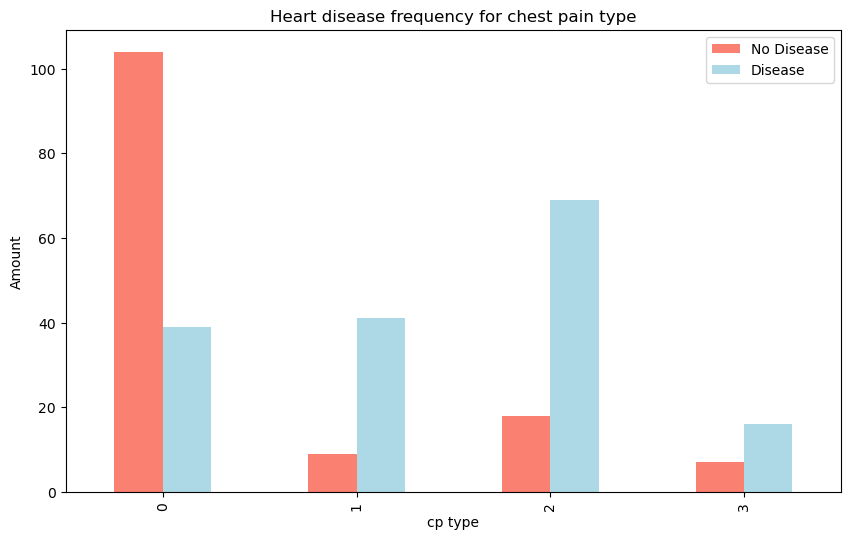

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=(["salmon","lightblue"]))
plt.title("Heart disease frequency for chest pain type")
plt.xlabel("cp type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

In [13]:
#MAke a corelation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


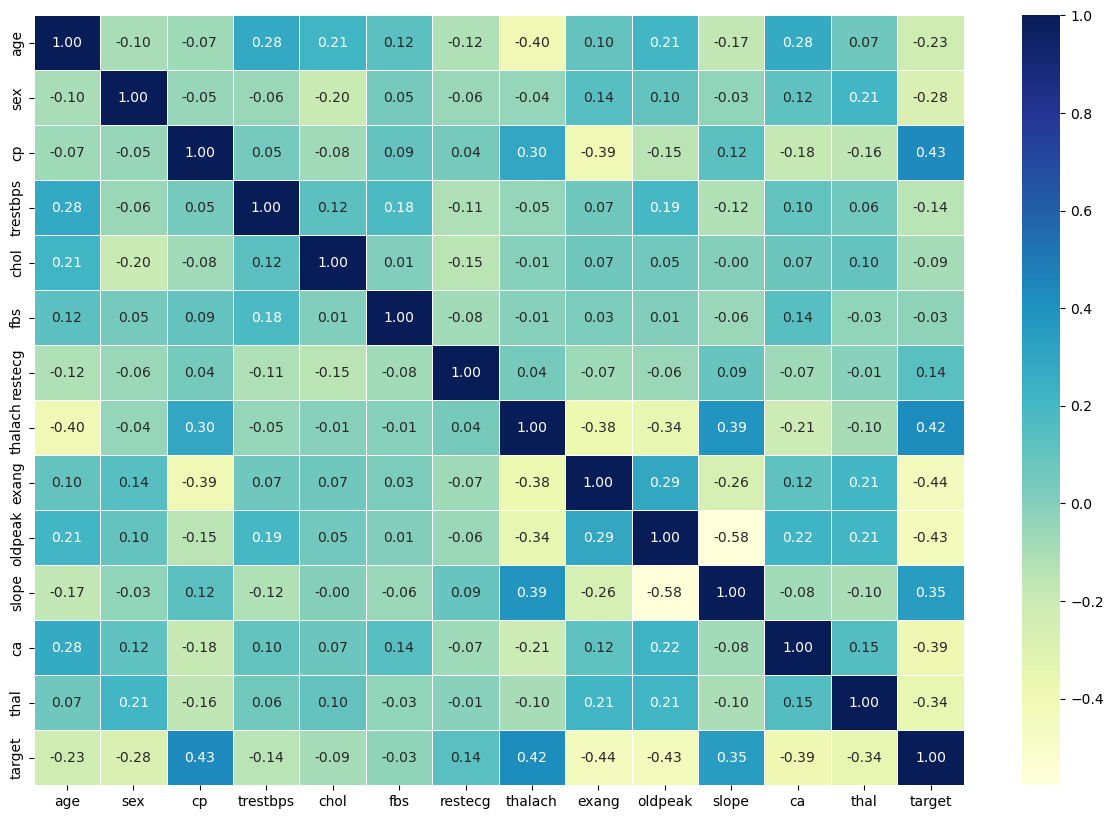

In [14]:
corr_matrix= df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")


In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
#Spliut the data into train and test 

np.random.seed(42)

X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train


132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [ ]:
#training the ml model and start predicting
models = {"Logistic Regression": LogisticRegression(),
      "KNN": KNeighborsClassifier(),
      "Random Forest": RandomForestClassifier()}

def fit_and_score(models,X_train, X_test, y_train,y_test):
    np.random.seed(42)
    model_scores={}    
    for name, model in models.items(): 
        model.fit(X_train, y_train)
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models,
                         X_train =X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)


C:\Users\skrgu\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

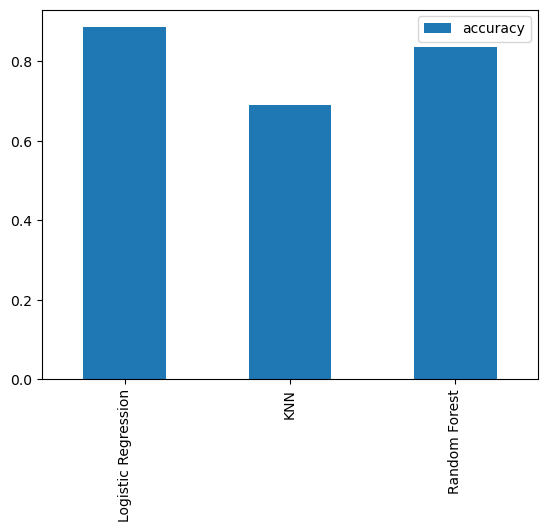

In [18]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [ ]:
train_scores=[]
test_scores=[]
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors : 
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    


In [20]:
train_scores
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

75.41%


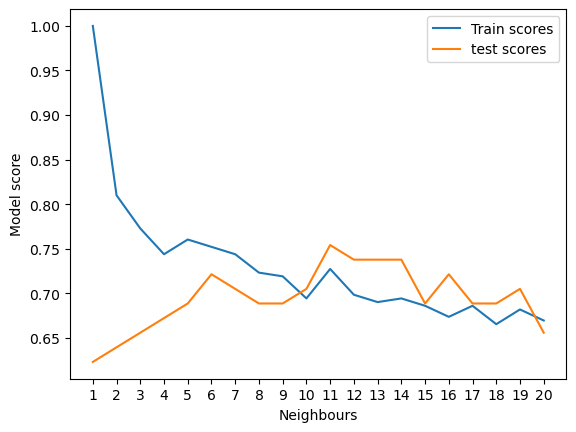

In [139]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="test scores")
plt.xlabel("Neighbours")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"{max(test_scores)*100:.2f}%")

In [36]:
#Hyperparameter tuning Logistic Regression and RamdomForestClassifier using
# Randommised searhCrossValidation

log_reg_params={"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

rran_for_params={"n_estimators": np.arange(10,1000,50),
                 "max_depth":[None,3,5,10],
                 "min_samples_split":np.arange(2,20,2),
                 "min_samples_leaf":np.arange(1,20,2)}

np.random.seed(42)

random_search_model = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_params,
                               cv=5,
                               n_iter =20,
                               verbose=True)

random_search_model.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
random_search_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
random_search_model.score(X_test,y_test)

0.8852459016393442

##Tuning Random Forest Classifier

In [40]:
np.random.seed(42)
forestModel = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rran_for_params,
                               cv=5,
                               n_iter =50,
                               verbose=True)

forestModel.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
forestModel.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
forestModel.score(X_test,y_test)

0.8688524590163934

In [ ]:
#GridSEarchCV with LogisticRegression model
np.random.seed(42)
log_reg_params={"C":np.logspace(-4,4,50),
               "solver":["liblinear"]}

grid_search_model = GridSearchCV(LogisticRegression(),
                               param_grid = log_reg_params,
                               cv=5,                               
                               verbose=True)


grid_search_model.fit(X_train,y_train)

In [45]:
grid_search_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
grid_search_model.best_index_

In [62]:
grid_search_model.score(X_test,y_test)

0.8852459016393442

In [66]:
y_preds = grid_search_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
y_preds,y_test


(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [70]:
np.random.seed(42)
cv_accu = cross_val_score(grid_search_model,X,y,cv=5,scoring="accuracy")
cv_accu

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


array([0.83606557, 0.90163934, 0.86885246, 0.86666667, 0.75      ])